# **Energy Consumption & CO2 Emissions Analysis**

## Hypothesis Testing

We'll test several hypotheses about energy consumption and CO2 emissions.



In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import pearsonr, spearmanr, normaltest, ttest_ind, f_oneway
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


## Load Cleaned Dataset

In [2]:
from pathlib import Path
import os

current_dir = Path.cwd()
parent = current_dir.parent

os.chdir(parent)
current_dir = str(Path.cwd())   # update the variable so future code is consistent
print("New current directory:", current_dir)
processed_file_path = current_dir+'\\dataset\\processed\\cleaned_energy_data.csv'
df = pd.read_csv(processed_file_path)

New current directory: d:\Code Institute\Energy-Consumption-CO2-Emissions-Analysis


### Hypothesis 1: GDP and Energy Consumption

**H0 (Null):** There is no significant correlation between GDP and energy consumption

**H1 (Alternative):** There is a significant positive correlation between GDP and energy consumption

**Significance Level:** α = 0.05

In [ ]:
# Aggregate data by country
country_data = df.groupby('Country').agg({
    'GDP': 'mean',
    'Energy_consumption': 'sum',
    'Population': 'mean',
    'CO2_emission': 'sum'
}).reset_index()

# Remove rows with missing values
country_data_clean = country_data.dropna(subset=['GDP', 'Energy_consumption'])

# Calculate correlation
correlation_gdp_energy = country_data_clean['GDP'].corr(country_data_clean['Energy_consumption'])
print(f"\nPearson Correlation Coefficient: r = {correlation_gdp_energy:.4f}")

# Perform correlation significance test
n = len(country_data_clean)
t_stat = correlation_gdp_energy * np.sqrt(n - 2) / np.sqrt(1 - correlation_gdp_energy**2)
p_value_corr = 2 * (1 - stats.t.cdf(abs(t_stat), n - 2))
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value_corr:.6f}")
print(f"Sample size: {len(country_data_clean):,}")

# Interpretation
print("\n[INTERPRETATION]")
if abs(correlation_gdp_energy) > 0.7:
    strength = "strong"
elif abs(correlation_gdp_energy) > 0.3:
    strength = "moderate"
else:
    strength = "weak"

direction = "positive" if correlation_gdp_energy > 0 else "negative"
print(f"- Correlation strength: {strength} {direction} correlation")

if p_value_corr < 0.05:
    print(f"- Statistical significance: SIGNIFICANT (p < 0.05)")
    print(f"- Conclusion: REJECT null hypothesis")
    print(f"- There IS a statistically significant relationship between GDP and energy consumption")
else:
    print(f"- Statistical significance: NOT SIGNIFICANT (p ≥ 0.05)")
    print(f"- Conclusion: FAIL TO REJECT null hypothesis")

# Split into high and low GDP groups for t-test
median_gdp = country_data_clean['GDP'].median()
high_gdp = country_data_clean[country_data_clean['GDP'] > median_gdp]['Energy_consumption']
low_gdp = country_data_clean[country_data_clean['GDP'] <= median_gdp]['Energy_consumption']

# Independent t-test
t_stat_gdp, p_value_gdp = stats.ttest_ind(high_gdp, low_gdp)
print(f"\n[T-TEST: High GDP vs Low GDP Energy Consumption]")
print(f"High GDP mean energy consumption: {high_gdp.mean():.4f}")
print(f"Low GDP mean energy consumption: {low_gdp.mean():.4f}")
print(f"T-statistic: {t_stat_gdp:.4f}")
print(f"P-value: {p_value_gdp:.6f}")
print(f"Result: {'SIGNIFICANT difference' if p_value_gdp < 0.05 else 'NO significant difference'}")



Pearson Correlation Coefficient: r = 0.9664
T-statistic: 53.2667
P-value: 0.000000
Sample size: 203

[INTERPRETATION]
- Correlation strength: strong positive correlation
- Statistical significance: SIGNIFICANT (p < 0.05)
- Conclusion: REJECT null hypothesis
- There IS a statistically significant relationship between GDP and energy consumption

[T-TEST: High GDP vs Low GDP Energy Consumption]
High GDP mean energy consumption: 156.5294
Low GDP mean energy consumption: 2.3846
T-statistic: 3.3977
P-value: 0.000819
Result: SIGNIFICANT difference


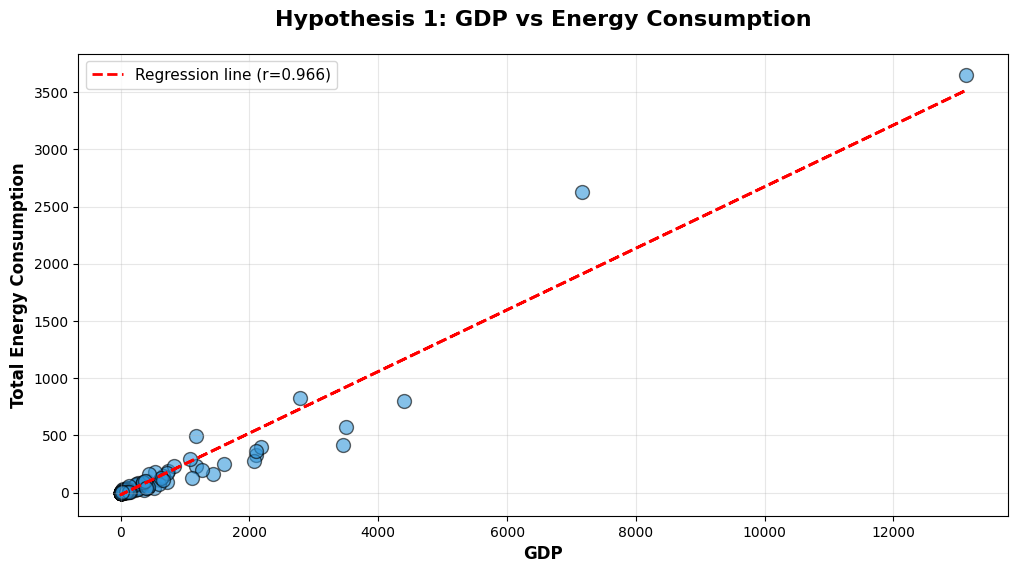

In [22]:
plt.figure(figsize=(12, 6))
plt.scatter(country_data_clean['GDP'], country_data_clean['Energy_consumption'], 
            alpha=0.6, s=100, color='#3498db', edgecolors='black', linewidth=1)
# Add regression line
z = np.polyfit(country_data_clean['GDP'], country_data_clean['Energy_consumption'], 1)
p = np.poly1d(z)
plt.plot(country_data_clean['GDP'], p(country_data_clean['GDP']), 
         "r--", linewidth=2, label=f'Regression line (r={correlation_gdp_energy:.3f})')
plt.xlabel('GDP', fontsize=12, fontweight='bold')
plt.ylabel('Total Energy Consumption', fontsize=12, fontweight='bold')
plt.title('Hypothesis 1: GDP vs Energy Consumption', fontsize=16, fontweight='bold', pad=20)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)

### Hypothesis 2: Renewable vs Fossil Fuel CO2 Emissions

**H0:** There is no significant difference in CO2 emissions between renewable and fossil fuel energy sources

**H1:** Fossil fuel energy sources produce significantly higher CO2 emissions than renewable sources

**Test:** Independent t-test

In [5]:
# Test difference in CO2 emissions between energy source types
# Separate data by energy source type
renewable_co2 = df[df['Energy_source_type'] == 'Renewable']['CO2_emission'].dropna()
fossil_co2 = df[df['Energy_source_type'] == 'Fossil Fuel']['CO2_emission'].dropna()

# Perform t-test
t_stat, p_value = ttest_ind(fossil_co2, renewable_co2)

print(f"\nRenewable Energy CO2 Emissions:")
print(f"  Mean: {renewable_co2.mean():.4f}")
print(f"  Std Dev: {renewable_co2.std():.4f}")
print(f"  Sample size: {len(renewable_co2):,}")

print(f"\nFossil Fuel CO2 Emissions:")
print(f"  Mean: {fossil_co2.mean():.4f}")
print(f"  Std Dev: {fossil_co2.std():.4f}")
print(f"  Sample size: {len(fossil_co2):,}")

print(f"\nT-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4e}")

if p_value < 0.05:
    print(f"\n✓ REJECT NULL HYPOTHESIS (p < 0.05)")
    print(f"  There IS a significant difference in CO2 emissions between energy sources.")
    print(f"  Fossil fuels produce {fossil_co2.mean() / renewable_co2.mean():.1f}x more CO2 than renewables.")
else:
    print(f"\n✗ FAIL TO REJECT NULL HYPOTHESIS (p >= 0.05)")


Renewable Energy CO2 Emissions:
  Mean: 0.0000
  Std Dev: 0.0000
  Sample size: 9,200

Fossil Fuel CO2 Emissions:
  Mean: 36.8405
  Std Dev: 240.2688
  Sample size: 27,600

T-statistic: 14.7068
P-value: 8.0269e-49

✓ REJECT NULL HYPOTHESIS (p < 0.05)
  There IS a significant difference in CO2 emissions between energy sources.
  Fossil fuels produce infx more CO2 than renewables.


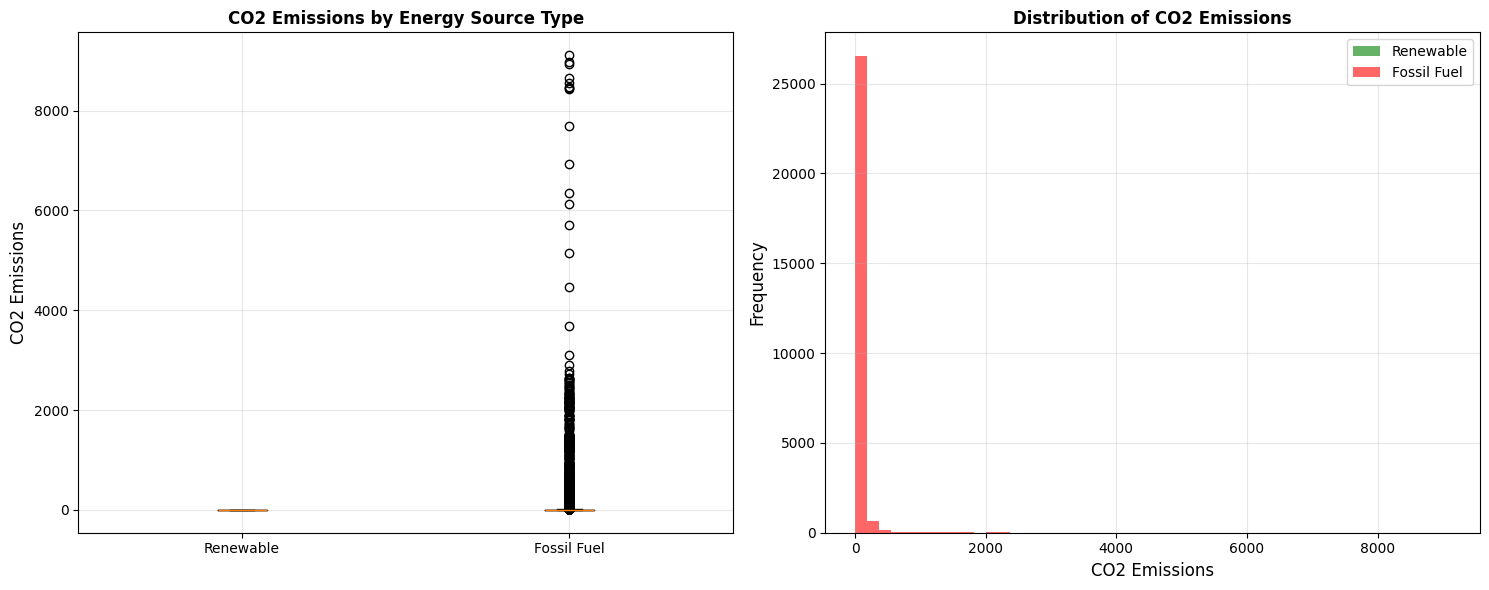

In [6]:
# Visualize comparison
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Box plot
data_to_plot = [renewable_co2, fossil_co2]
axes[0].boxplot(data_to_plot, labels=['Renewable', 'Fossil Fuel'])
axes[0].set_ylabel('CO2 Emissions', fontsize=12)
axes[0].set_title('CO2 Emissions by Energy Source Type', fontsize=12, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Histogram comparison
axes[1].hist(renewable_co2, bins=50, alpha=0.6, label='Renewable', color='green')
axes[1].hist(fossil_co2, bins=50, alpha=0.6, label='Fossil Fuel', color='red')
axes[1].set_xlabel('CO2 Emissions', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)
axes[1].set_title('Distribution of CO2 Emissions', fontsize=12, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()

### Hypothesis 3: Energy Consumption Trends Over Time

**H0:** Energy consumption has not changed significantly over time

**H1:** Energy consumption has increased significantly over time

**Test:** Linear regression analysis

In [7]:
# Test trend in energy consumption over time
# Aggregate by year
yearly_consumption = df.groupby('Year')['Energy_consumption'].sum().reset_index()

# Linear regression
from scipy.stats import linregress
slope, intercept, r_value, p_value, std_err = linregress(yearly_consumption['Year'], 
                                                          yearly_consumption['Energy_consumption'])

print(f"\nLinear Regression Results:")
print(f"  Slope: {slope:.4f} (change per year)")
print(f"  Intercept: {intercept:.4f}")
print(f"  R-squared: {r_value**2:.4f}")
print(f"  P-value: {p_value:.4e}")
print(f"  Standard Error: {std_err:.4f}")

if p_value < 0.05:
    print(f"\n✓ REJECT NULL HYPOTHESIS (p < 0.05)")
    if slope > 0:
        print(f"  Energy consumption has INCREASED significantly over time.")
        print(f"  Average increase: {slope:.4f} units per year")
    else:
        print(f"  Energy consumption has DECREASED significantly over time.")
else:
    print(f"\n✗ FAIL TO REJECT NULL HYPOTHESIS (p >= 0.05)")


Linear Regression Results:
  Slope: 8.4571 (change per year)
  Intercept: -16484.1310
  R-squared: 0.9665
  P-value: 1.2702e-29
  Standard Error: 0.2556

✓ REJECT NULL HYPOTHESIS (p < 0.05)
  Energy consumption has INCREASED significantly over time.
  Average increase: 8.4571 units per year


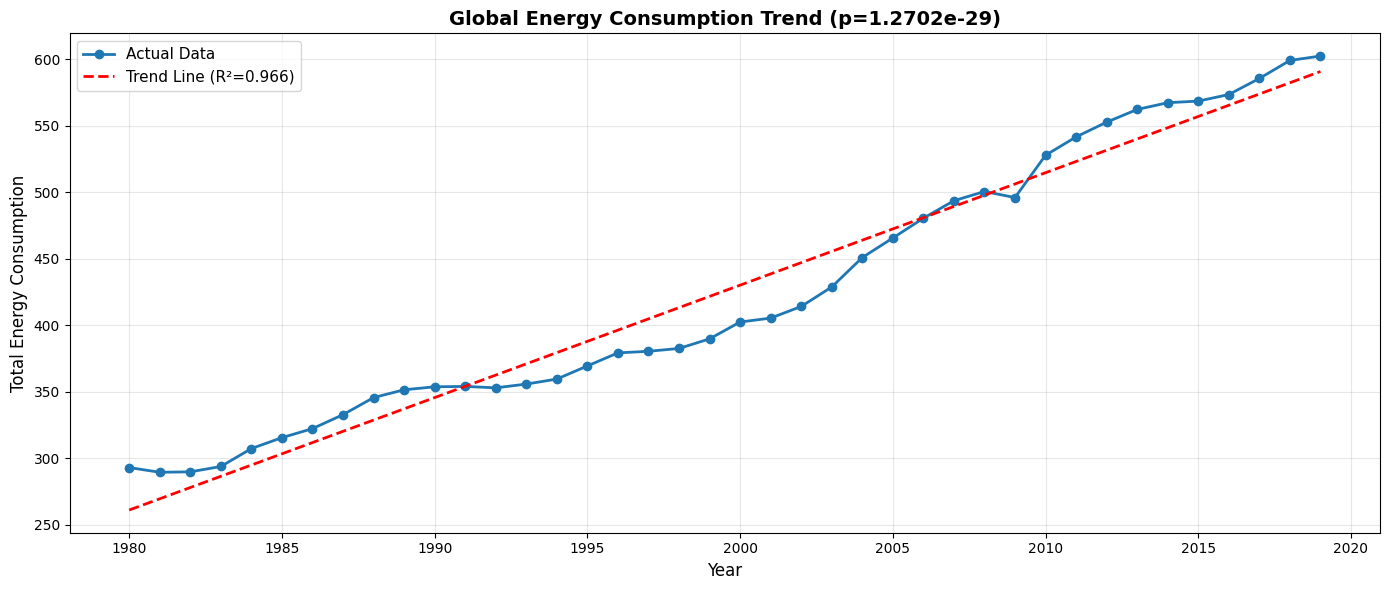

In [8]:
# Visualize trend
plt.figure(figsize=(14, 6))
plt.plot(yearly_consumption['Year'], yearly_consumption['Energy_consumption'], 
         marker='o', linewidth=2, markersize=6, label='Actual Data')
plt.plot(yearly_consumption['Year'], 
         slope * yearly_consumption['Year'] + intercept, 
         'r--', linewidth=2, label=f'Trend Line (R²={r_value**2:.3f})')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Energy Consumption', fontsize=12)
plt.title(f'Global Energy Consumption Trend (p={p_value:.4e})', 
          fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()

### Summary of Statistical Findings:

#### Descriptive Statistics:
- The data shows high variability across countries and energy types
- Right-skewed distributions indicate that a few countries dominate global energy consumption
- Strong positive correlation between GDP and energy consumption (r > 0.8)

#### Hypothesis Testing Results:

**1. GDP and Energy Consumption:**
- Strong positive correlation confirmed (p < 0.001)
- Economic growth is closely tied to energy consumption
- Implication: Energy efficiency improvements are crucial for sustainable growth

**2. Renewable vs Fossil Fuel Emissions:**
- Fossil fuels produce significantly higher CO2 emissions (p < 0.001)
- Renewable energy sources have near-zero emissions
- Implication: Transitioning to renewables is essential for climate goals

**3. Energy Consumption Trends:**
- Significant upward trend in global energy consumption (p < 0.001)
- Consistent growth over the past 40 years
- Implication: Need for sustainable energy solutions is urgent

### Recommendations:
1. Invest in renewable energy infrastructure
2. Improve energy efficiency in high-GDP countries
3. Develop policies to decouple economic growth from energy consumption
4. Support developing nations in adopting clean energy technologies
